In [33]:
# import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


In [34]:
# for google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# load csv
file_path = "/content/drive/My Drive/0 - School Work/Master's Classes/2025 Spring/Data Mining/NFL Play by Play 2009-2018 (v5).csv"
df = pd.read_csv(file_path)

<ipython-input-35-c5968d2e5e19>:3: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [36]:
df.head(5)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [37]:
df.shape

(449371, 255)

In [38]:
# filter pass plays
pass_df = df[df['play_type'] == 'pass']
pass_df.shape

(186677, 255)

In [39]:
# select input features and target
input_features = pass_df[['quarter_seconds_remaining', 'down', 'ydstogo', 'yardline_100',
                     'pass_length', 'score_differential', 'qb_scramble', 'shotgun', 'no_huddle',
                     'qtr', 'posteam_score', 'defteam_score', 'goal_to_go']]


target_features = pass_df['pass_touchdown']

# drop missing values and align tables
input_features = input_features.dropna()
target_features = target_features.loc[input_features.index]

input_features.head()

,quarter_seconds_remaining,down,ydstogo,yardline_100,pass_length,score_differential,qb_scramble,shotgun,no_huddle,qtr,posteam_score,defteam_score,goal_to_go
1,893.0,1.0,10,58.0,short,0.0,0,0,0,1,0.0,0.0,0.0
3,815.0,3.0,8,56.0,deep,0.0,0,1,0,1,0.0,0.0,0.0
6,760.0,2.0,10,98.0,short,0.0,0,0,0,1,0.0,0.0,0.0
9,684.0,1.0,10,43.0,short,0.0,0,0,0,1,0.0,0.0,0.0
10,648.0,2.0,7,40.0,short,0.0,0,0,0,1,0.0,0.0,0.0


In [40]:
target_features.head()

,pass_touchdown
1,0.0
3,0.0
6,0.0
9,0.0
10,0.0


In [41]:
input_features.shape

(173859, 13)

In [42]:
# Identify Categorical and Numeric Columns
categorical_cols = ['pass_length', 'qtr', 'goal_to_go']
numeric_cols = [col for col in input_features.columns if col not in categorical_cols]

# Create Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

In [43]:
# transform inputs
X = preprocessor.fit_transform(input_features)
y = target_features

In [44]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=513)


In [45]:
# fit naive bayes model
nb_model = GaussianNB()
nb_model.fit(X_train.toarray() if hasattr(X_train, 'toarray') else X_train, y_train)

GaussianNB()

In [46]:
# evaluate model
y_pred = nb_model.predict(X_test.toarray() if hasattr(X_test, 'toarray') else X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9396065800069021
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     33197
         1.0       0.35      0.37      0.36      1575

    accuracy                           0.94     34772
   macro avg       0.66      0.67      0.66     34772
weighted avg       0.94      0.94      0.94     34772



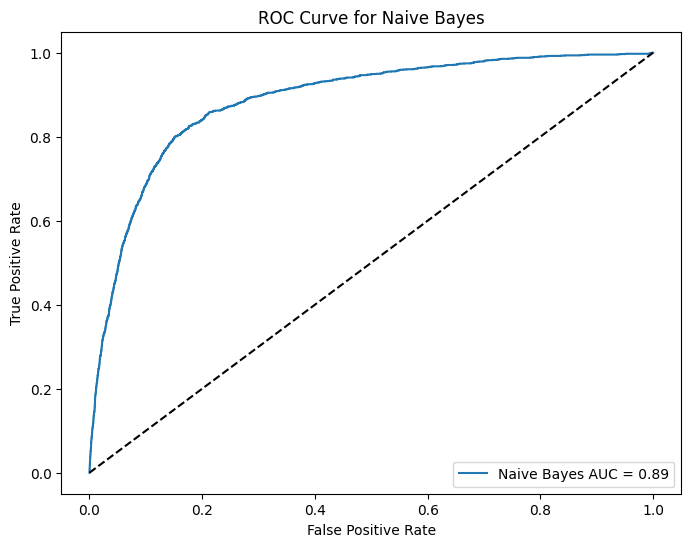

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = nb_model.predict_proba(X_test.toarray() if hasattr(X_test, 'toarray') else X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()


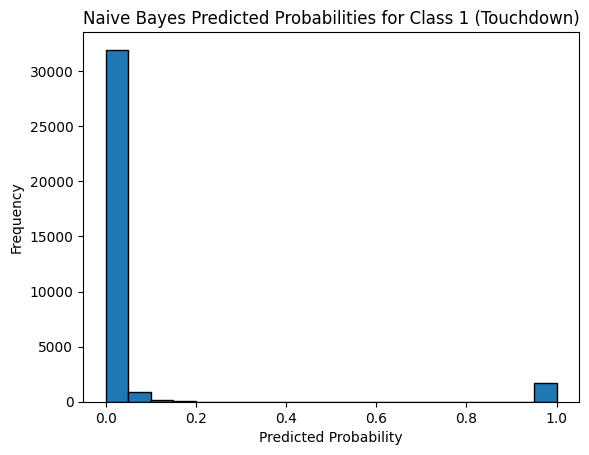

In [48]:
plt.hist(y_prob, bins=20, edgecolor='black')
plt.title('Naive Bayes Predicted Probabilities for Class 1 (Touchdown)')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


Example Plays:

In [50]:
# Step 1: Match the training features exactly (no extra columns)
new_data = {
    'quarter_seconds_remaining': [893],
    'down': [1],
    'ydstogo': [10],
    'yardline_100': [13],
    'pass_length': ['short'],
    'score_differential': [0],
    'qb_scramble': [0],
    'shotgun': [0],
    'no_huddle': [0],
    'qtr': [1],
    'posteam_score': [0],
    'defteam_score': [0],
    'goal_to_go': [False]
}

X_new = pd.DataFrame(new_data)

# Step 2: Transform using the same fitted preprocessor
X_new_transformed = preprocessor.transform(X_new)
if hasattr(X_new_transformed, 'toarray'):
    X_new_transformed = X_new_transformed.toarray()

# Step 3: Predict using Naive Bayes
nb_prediction = nb_model.predict(X_new_transformed)
nb_prob = nb_model.predict_proba(X_new_transformed)[0][1]

# Step 4: Output the prediction
print("Naive Bayes Prediction (0 = No TD, 1 = TD):", nb_prediction[0])
print("Naive Bayes TD Probability:", round(nb_prob, 4))


Naive Bayes Prediction (0 = No TD, 1 = TD): 0.0
Naive Bayes TD Probability: 0.0197


In [51]:
# Step 1: Match the training features exactly (no extra columns)
new_data = {
    'quarter_seconds_remaining': [51],
    'down': [2],
    'ydstogo': [3],
    'yardline_100': [4],
    'pass_length': ['short'],
    'score_differential': [7],
    'qb_scramble': [0],
    'shotgun': [1],
    'no_huddle': [1],
    'qtr': [4],
    'posteam_score': [24],
    'defteam_score': [17],
    'goal_to_go': [True]
}

X_new = pd.DataFrame(new_data)

# Step 2: Transform using the same fitted preprocessor
X_new_transformed = preprocessor.transform(X_new)
if hasattr(X_new_transformed, 'toarray'):
    X_new_transformed = X_new_transformed.toarray()

# Step 3: Predict using Naive Bayes
nb_prediction = nb_model.predict(X_new_transformed)
nb_prob = nb_model.predict_proba(X_new_transformed)[0][1]

# Step 4: Output the prediction
print("Naive Bayes Prediction (0 = No TD, 1 = TD):", nb_prediction[0])
print("Naive Bayes TD Probability:", round(nb_prob, 4))


Naive Bayes Prediction (0 = No TD, 1 = TD): 1.0
Naive Bayes TD Probability: 1.0
